# Exploration of MNIST data set

In [1]:
import os
import sys
sys.path.append("../")
from dotenv import find_dotenv, load_dotenv
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import torchvision.transforms as T
import torch.nn as nn

from src.utils import CustomMnistDataset, imshow

load_dotenv(find_dotenv())

DATA_DIR= os.getenv('DATA_DIR')


/Users/b7064522/opt/miniconda3/envs/drenv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

train_dataset = CustomMnistDataset(img_dir = DATA_DIR, train=True)
test_dataset = CustomMnistDataset(img_dir = DATA_DIR, train=False)


In [3]:
BATCH_SIZE = 5
SHUFFLE = True
train_dataloader = DataLoader(train_dataset, batch_size = BATCH_SIZE, shuffle = SHUFFLE)
test_dataloader = DataLoader(test_dataset, batch_size = BATCH_SIZE, shuffle = SHUFFLE)

## Training Examples

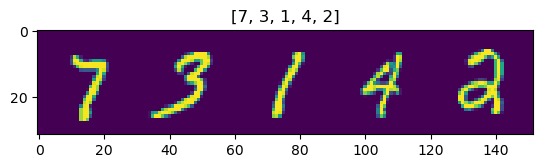

In [4]:
inputs, classes = next(iter(train_dataloader))
out = make_grid(inputs, nrow=5)
imshow(out, title = [int(x.numpy()) for x in classes])

## Test Examples

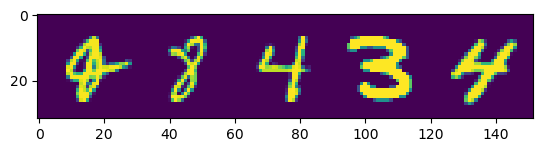

In [5]:
inputs = next(iter(test_dataloader))
out = make_grid(inputs[0], nrow=5)
imshow(out)

## Rotations and translations

In [6]:
augmentation = nn.Sequential(
    T.RandomAffine(degrees = 22.5, translate = (0.2, 0.2), scale = (0.5, 1))
)
aug_dataset = CustomMnistDataset(img_dir = DATA_DIR, train=True, transform=augmentation)
aug_dataloader = DataLoader(aug_dataset, batch_size = BATCH_SIZE, shuffle = SHUFFLE)

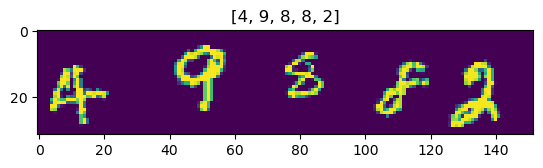

In [7]:
inputs, classes = next(iter(aug_dataloader))
out = make_grid(inputs, nrow=5)
imshow(out, title = [int(x.numpy()) for x in classes])